In [1]:
import os
import pickle as pkl
import sys
import numpy as np
import pandas as pd
from bokeh.plotting import output_file
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
try:
    os.environ['SESNPATH']
    os.environ['SESNCFAlib']

except KeyError:
    print ("must set environmental variable SESNPATH and SESNCfAlib")
    sys.exit()

cmd_folder = os.getenv("SESNCFAlib")
if cmd_folder not in sys.path:
    sys.path.insert(0, cmd_folder)
cmd_folder = os.getenv("SESNCFAlib") + "/templates"
if cmd_folder not in sys.path:
    sys.path.insert(0, cmd_folder)

from savgol import savitzky_golay
from snclasses import *
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, MaxNLocator

In [2]:
SNTYPES = ['Ib','IIb','Ic','Ic-bl', 'Ibn']
bands = ['U','B','V', 'g', 'R', 'I', 'rp','ip','up','J','H','K','m2','w1','w2']
colorTypes = {'IIb':'FireBrick',
             'Ib':'SteelBlue',
             'Ic':'DarkGreen',
             'Ic-bl':'DarkOrange',
             'Ibn':'purple'}

In [6]:
tmpl = {}

In [8]:
SNTYPES = ['Ib','IIb','Ic','Ic-bl', 'Ibn']


for bb in bands:
    tmpl[bb] = {}
    

    for SNTYPE in SNTYPES:
        
        tmpl[bb][SNTYPE] = {}

        try:
            path = "outputs/GPs_2022/GPalltemplfit_%s_%s_V0.pkl"%(SNTYPE,bb)
            tmpl_ = pkl.load(open(path, "rb"))
        except:
            continue
        
        
        
#         print(tmpl_['rollingMedian'])

        tmpl[bb][SNTYPE] = tmpl_
    
        if np.nansum(tmpl_['rollingMedian']) == 0:
            print(bb, SNTYPE)
            continue

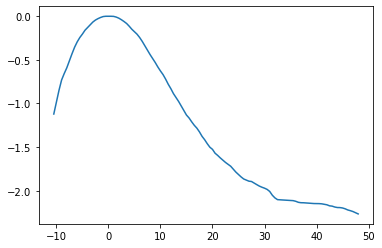

In [9]:
b = 'g'

plt.plot(tmpl[b]['Ib']['t'],tmpl[b]['Ib']['rollingMedian'])